Jelle, July 2016

This notebook contains some basic tests to check the base model is correctly configured.

In [1]:
import numpy as np
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # resize plots

from blueice.inference import bestfit_scipy
from blueice.model import Model

from laidbax.base_model import config, simplified_config

In [2]:
# Create the model from scratch (takes a minute or more to sample the PDFs the first time you run this)
m = Model(config)
sm = Model(simplified_config)

Energy spectra of sources included in model:

(1e-11, 0.01)

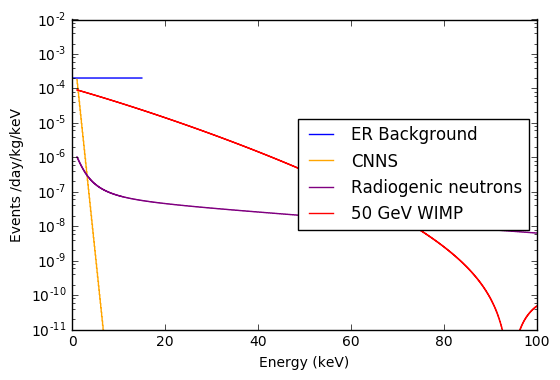

In [3]:
for s in m.sources:
    s.energy_distribution.plot(label=s.config['label'], color=s.config['color'])
plt.yscale('log')

plt.ylabel('Events /day/kg/keV')
plt.xlabel("Energy (keV)")
plt.legend(loc='center right')
plt.ylim(1e-11, 1e-2)

Yields used for S1 and S2 generation:

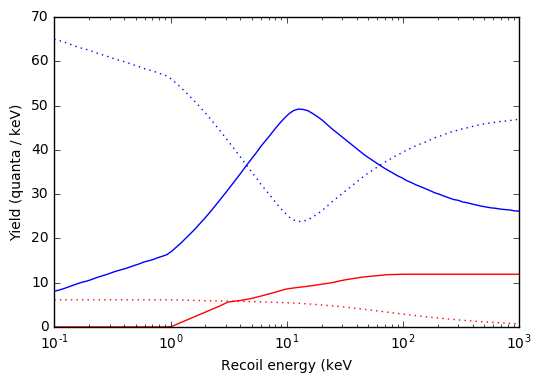

In [4]:
s = m.sources[0]
e= np.logspace(-1, 3, 100)
for recoil_type, color in (('er', 'b'), ('nr', 'r')):
        for quantum_type, linestyle in (('photon', '-'), ('electron', ':')):
            plt.plot(e, s.yield_at(e,  recoil_type, quantum_type), c=color, linestyle=linestyle)
plt.xscale('log')
plt.xlabel("Recoil energy (keV")
plt.ylabel("Yield (quanta / keV)")
plt.show()

What fraction of the total events produced an event inside the analysis space (as opposed to an event out of range or no event at all)?

In [5]:
print([(s.name, s.fraction_in_range) for s in m.sources])
print([(s.name, s.fraction_in_range) for s in sm.sources])

[('er_bg', 0.64383449999999998), ('cnns', 0.0068339999999999998), ('radiogenics', 0.49706299999999998), ('wimp_50gev', 0.70588200000000001)]
[('er_bg', 0.61896439999999997), ('cnns', 0.010439800000000001), ('radiogenics', 0.50628819999999997), ('wimp_50gev', 0.68726880000000001)]


Simulate a single toy data set:

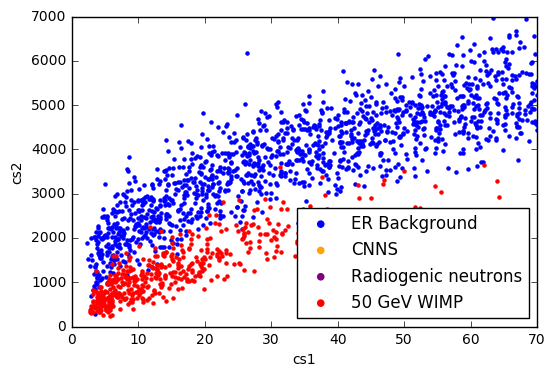

In [6]:
d = m.simulate()
m.show(d)
plt.legend(loc='lower right', scatterpoints=1, markerscale=2)

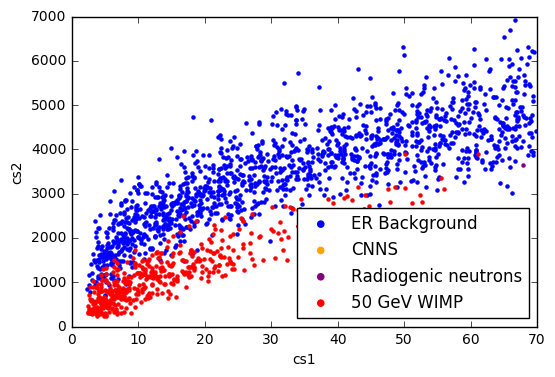

In [7]:
# Same for the simplified model:
d = sm.simulate()
m.show(d)
plt.legend(loc='lower right', scatterpoints=1, markerscale=2)

In [8]:
m.sources[0].pdf_histogram.plot()

AttributeError: 'RegularXENONSource' object has no attribute 'pdf_histogram'

In [ ]:
m.sources[-1].pdf_histogram.plot()